In [5]:
# python 3.12

from transformers import pipeline
import torch
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import time

C:\Users\lmitt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading local image

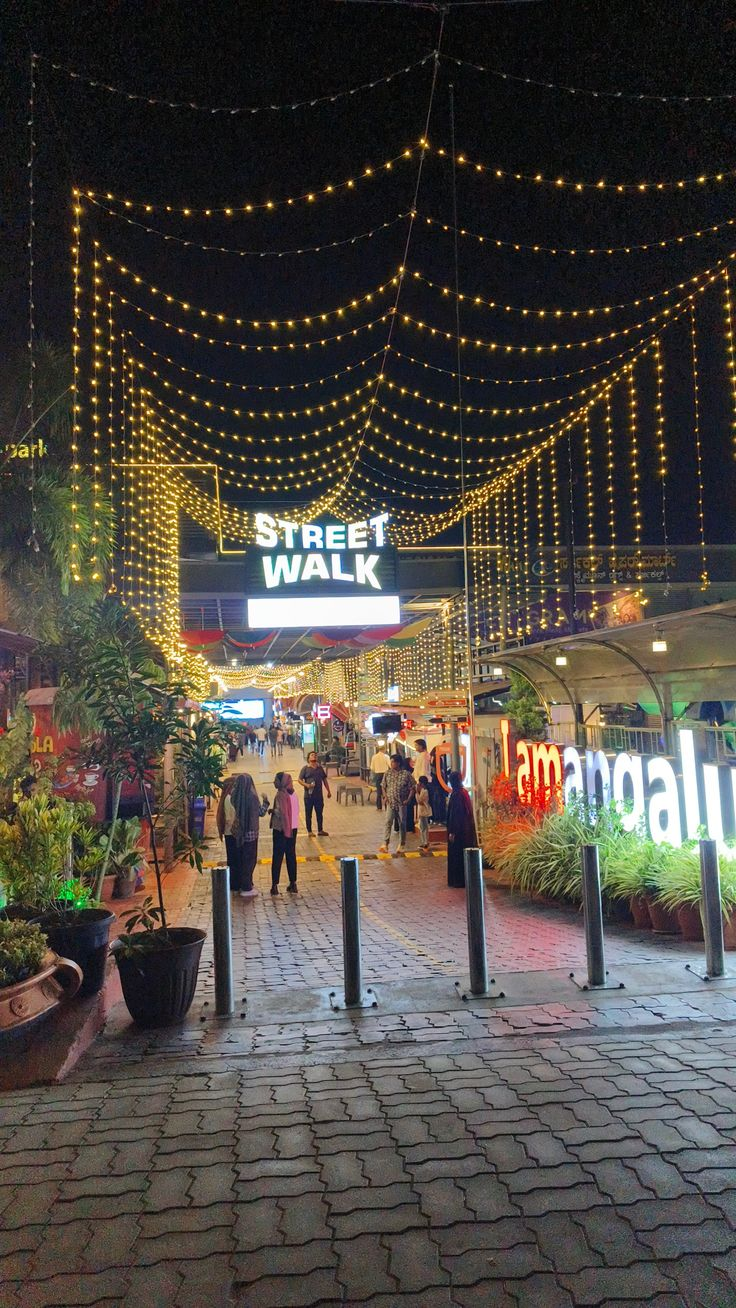

In [6]:
# loading image

image = Image.open(r"imagesample.jpg") # testing with realistic close range scene
# image = Image.open(r"imagesample2.jpeg") # testing with realistic far range scene
image

### Variations of depth estimation model

In [ ]:
# AI depth estimation with small model

pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-small-hf")
result = pipe(image)
result["depth"]

In [ ]:
# AI depth estimation with base model

pipe = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-base-hf")
result = pipe(image)
result["depth"]

In [ ]:
# AI depth estimation with v2 small

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Small-hf")
result = pipe(image)
result["depth"]

In [7]:
# AI depth estimation with v2 base

pipe = pipeline(task="depth-estimation", model="depth-anything/Depth-Anything-V2-Base-hf")
result = pipe(image)
depthimage = result["depth"]

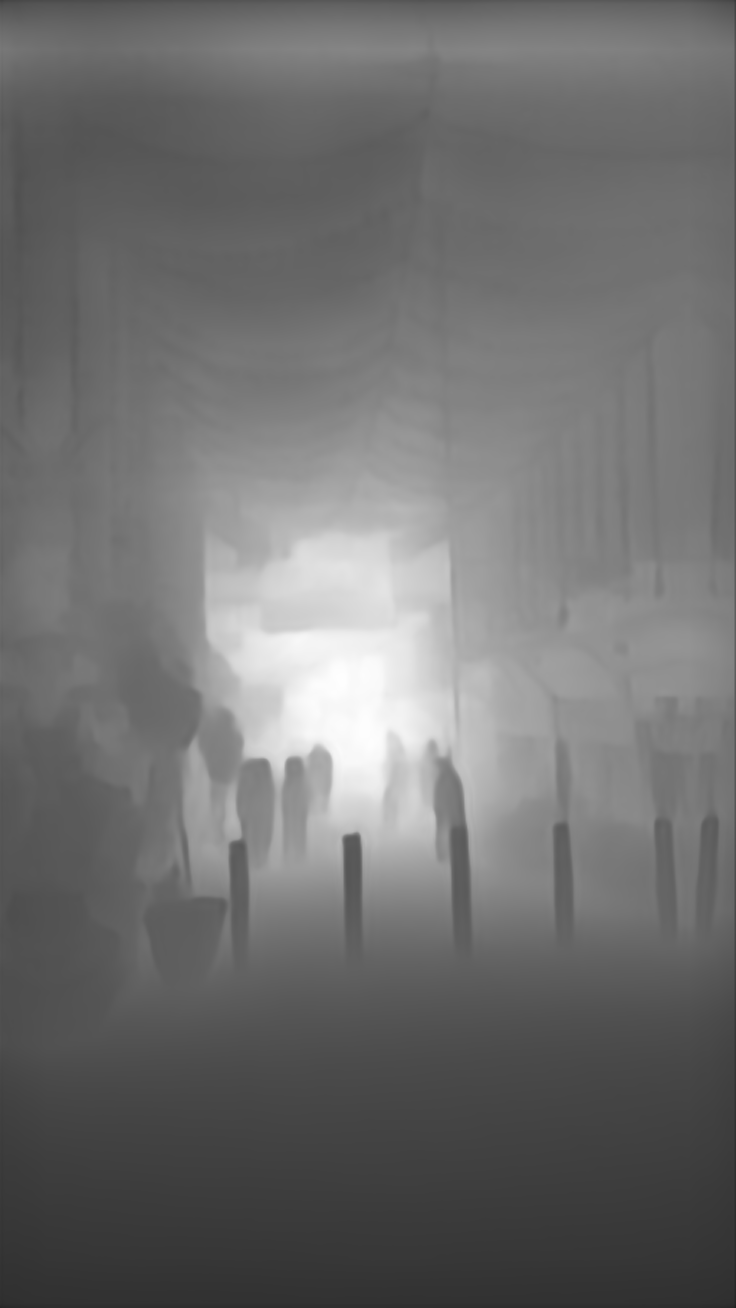

In [10]:
# AI depth estimation with zoedepth

pipe = pipeline(task="depth-estimation", model="Intel/zoedepth-nyu-kitti")
result = pipe(image)
result["depth"]

### Image processing and identifying closest object

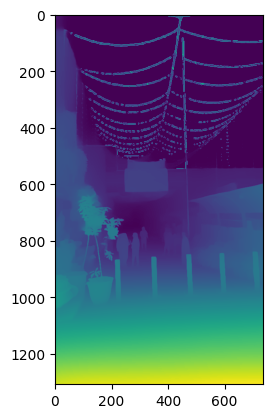

In [8]:
depthimagearray = np.array(depthimage)
blurimage = cv2.GaussianBlur(depthimagearray,(5,5),0)
min, max, micloc, maxloc = cv2.minMaxLoc(blurimage)

# print(maxloc, max)
# cv2.circle(depthimagearray, maxloc, 100, (255, 255, 255), 100)

plt.imshow(depthimagearray)
plt.show()

In [9]:
# assuming camera field of view is 80°

imageWidth = depthimagearray.shape[1]
cameraFOV = 80

# x:maxloc[0]::80:736
depthAngle = (maxloc[0]*cameraFOV)/imageWidth

text = f'closest object at {5 * round(round(depthAngle) / 5)} degrees' 
print(text)

closest object at 75 degrees


In [4]:
from gtts import gTTS
from playsound import playsound


tts = gTTS(text=text, lang='en')
tts.save("audio.mp3")
playsound('audio.mp3')
